<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork928-2023-01-01">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Data Visualization Lab**


Estimated time needed: **45 to 60** minutes


In this assignment you will be focusing on the visualization of data.

The data set will be presented to you in the form of a RDBMS.

You will have to use SQL queries to extract the data.


## Objectives


In this lab you will perform the following:


-   Visualize the distribution of data.

-   Visualize the relationship between two features.

-   Visualize composition of data.

-   Visualize comparison of data.


<hr>


## Demo: How to work with database


Download database file.


In [1]:
!wget https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m4_survey_data.sqlite

--2024-07-01 08:43:34--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m4_survey_data.sqlite
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.63.118.104, 169.63.118.104
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.63.118.104|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 36679680 (35M) [application/octet-stream]
Saving to: ‘m4_survey_data.sqlite’

m4_survey_data.sqli 100%[===================>]  34.98M  31.8MB/s    in 1.1s    

2024-07-01 08:43:37 (31.8 MB/s) - ‘m4_survey_data.sqlite’ saved [36679680/36679680]



Connect to the database.


In [2]:
import sqlite3
conn = sqlite3.connect("m4_survey_data.sqlite") # open a database connection

Import pandas module.


In [3]:
import pandas as pd

## Demo: How to run an sql query


In [113]:
# print how many rows are there in the table named 'master'
QUERY = """
SELECT COUNT(*)
FROM master
"""

# the read_sql_query runs the sql query and returns the data as a dataframe
df = pd.read_sql_query(QUERY,conn)
df.head()

,COUNT(*)
0,11398


## Demo: How to list all tables


In [97]:
# print all the tables names in the database
QUERY = """
SELECT name as Table_Name FROM
sqlite_master WHERE
type = 'table'
"""
# the read_sql_query runs the sql query and returns the data as a dataframe
pd.read_sql_query(QUERY,conn)


,Table_Name
0,EduOther
1,DevType
2,LastInt
3,JobFactors
4,WorkPlan
5,WorkChallenge
6,LanguageWorkedWith
7,LanguageDesireNextYear
8,DatabaseWorkedWith
9,DatabaseDesireNextYear


## Demo: How to run a group by query


In [ ]:
QUERY = """
SELECT Age,COUNT(*) as count
FROM master
group by age
order by age
"""
pd.read_sql_query(QUERY,conn)

## Demo: How to describe a table


In [ ]:
table_name = 'master'  # the table you wish to describe

QUERY = """
SELECT sql FROM sqlite_master
WHERE name= '{}'
""".format(table_name)

df = pd.read_sql_query(QUERY,conn)
print(df.iat[0,0])

# Hands-on Lab


## Visualizing distribution of data


### Histograms


Plot a histogram of `ConvertedComp.`


In [21]:

import matplotlib.pyplot as plt

In [30]:
# your code goes here
QUERY = """
SELECT ConvertedComp FROM master
"""
df = pd.read_sql_query(QUERY,conn)


<AxesSubplot:ylabel='Frequency'>

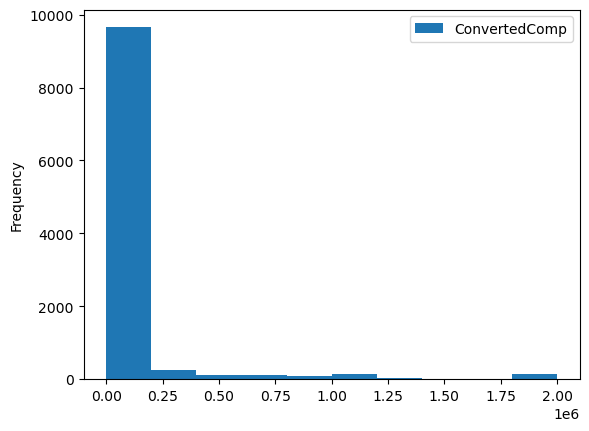

In [31]:
df.plot.hist()

### Box Plots


Plot a box plot of `Age.`


<AxesSubplot:>

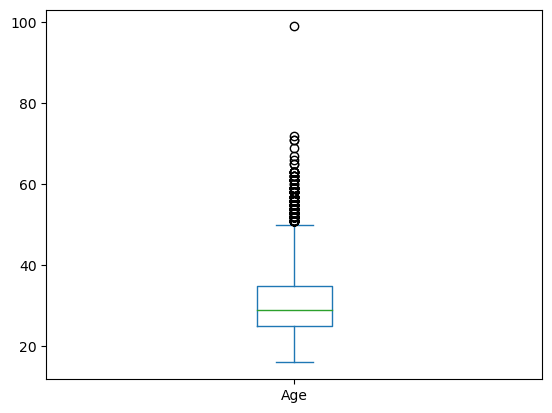

In [32]:
# your code goes here

QUERY = """
SELECT Age FROM Master
"""
df = pd.read_sql_query(QUERY,conn)
df.plot.box()

## Visualizing relationships in data


### Scatter Plots


Create a scatter plot of `Age` and `WorkWeekHrs.`


<AxesSubplot:xlabel='Age', ylabel='WorkWeekHrs'>

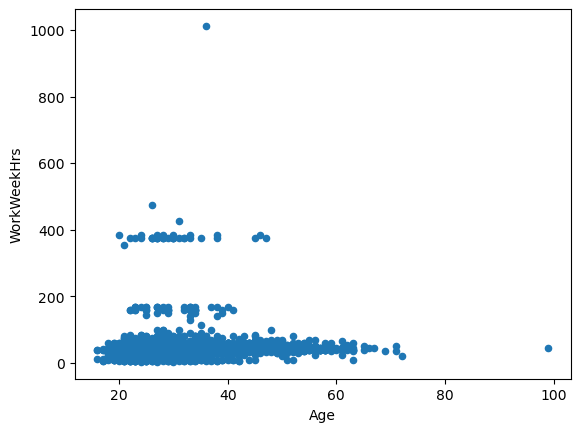

In [34]:
# your code goes here

QUERY = """
SELECT Age, WorkWeekHrs FROM Master
"""
df = pd.read_sql_query(QUERY,conn)
df.plot.scatter(x='Age',y='WorkWeekHrs')

### Bubble Plots


Create a bubble plot of `WorkWeekHrs` and `CodeRevHrs`, use `Age` column as bubble size.


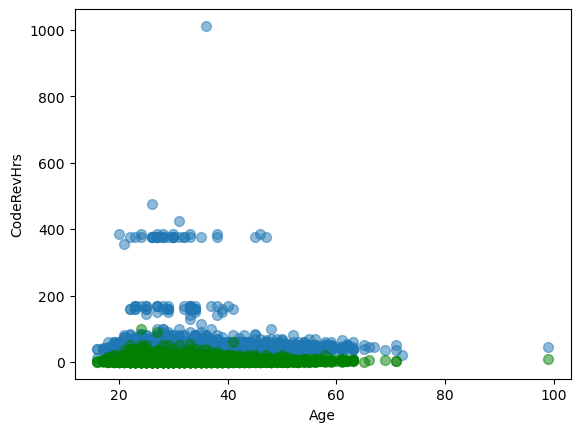

In [44]:
# your code goes here

QUERY = """
SELECT Age, WorkWeekHrs, CodeRevHrs FROM Master
"""
df = pd.read_sql_query(QUERY,conn)

ax0 = df.plot.scatter(
    x='Age',
    y='WorkWeekHrs',
    alpha=0.5,
    s=50)

ax1 = df.plot.scatter(
    x='Age',
    y='CodeRevHrs',
    color='green',
    alpha=0.5,
    s=50,
    ax=ax0)

## Visualizing composition of data


### Pie Charts


Create a pie chart of the top 5 databases that respondents wish to learn next year. Label the pie chart with database names. Display percentages of each database on the pie chart.


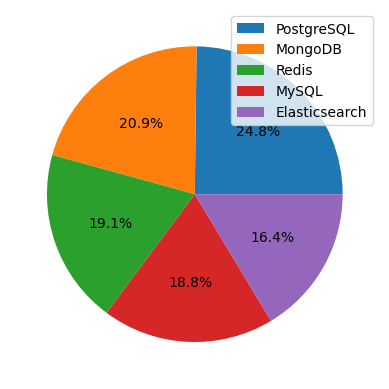

In [60]:
# your code goes here
QUERY="""
SELECT DatabaseDesireNextYear, Count(*) as Count
FROM DatabaseDesireNextYear
GROUP BY DatabaseDesireNextYear
ORDER BY Count DESC
LIMIT 5
"""

df = pd.read_sql_query(QUERY, conn)

plt.pie(df['Count'], autopct="%1.1f%%")
plt.legend(labels=df['DatabaseDesireNextYear'])

In [108]:
QUERY="""
SELECT LanguageWorkedWith, Count(*) as Count
FROM LanguageWorkedWith
WHERE LanguageworkedWith = 'SQL'
GROUP BY LanguageWorkedWith
"""

df = pd.read_sql_query(QUERY, conn)
df

,LanguageWorkedWith,Count
0,SQL,7106


### Stacked Charts


Create a stacked chart of median `WorkWeekHrs` and `CodeRevHrs` for the age group 30 to 35.


<AxesSubplot:xlabel='Age'>

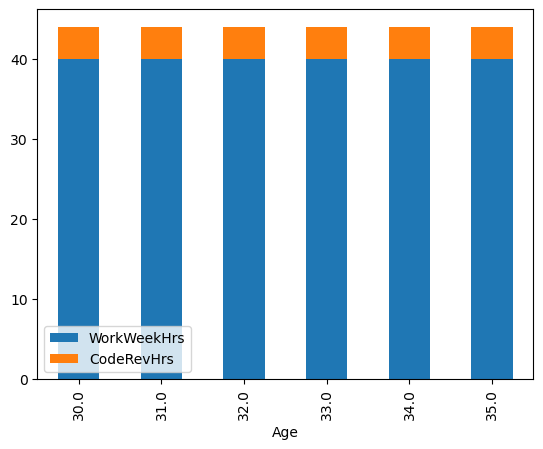

In [65]:
# your code goes here
QUERY="""
SELECT WorkWeekHrs, CodeRevHrs, Age
FROM Master
WHERE Age BETWEEN 30 AND 35
"""
df = pd.read_sql_query(QUERY, conn)
df1 = df.groupby('Age').median()
df1.plot(kind='bar',stacked=True)

## Visualizing comparison of data


### Line Chart


Plot the median `ConvertedComp` for all ages from 45 to 60.


<AxesSubplot:xlabel='Age'>

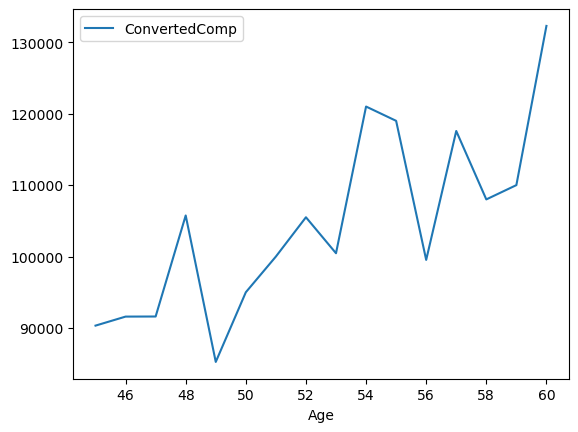

In [73]:
# your code goes here
QUERY="""
SELECT ConvertedComp, Age
FROM Master
WHERE Age BETWEEN 45 AND 60
"""
df = pd.read_sql_query(QUERY, conn)
df1 = df.groupby('Age').median()
df1.plot.line()

<AxesSubplot:xlabel='Age'>

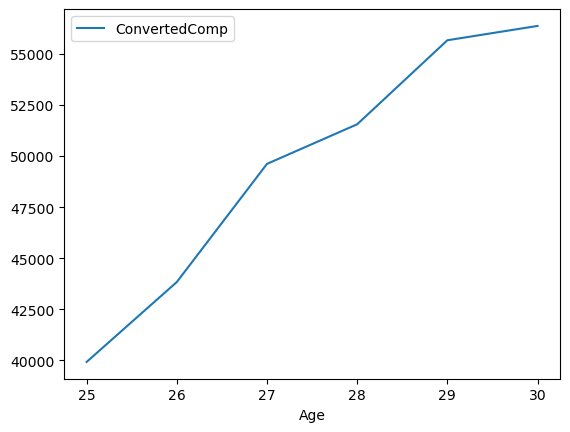

In [125]:
QUERY="""
SELECT ConvertedComp, Age
FROM Master
WHERE Age BETWEEN 25 AND 30
"""
df = pd.read_sql_query(QUERY, conn)
df1 = df.groupby('Age').median()
df1.plot.line()

In [123]:
QUERY="""
SELECT DevType, Count(*) AS Count
FROM DevType
GROUP BY DevType
ORDER BY Count DESC
"""
df = pd.read_sql_query(QUERY, conn)
df

,DevType,Count
0,"Developer, full-stack",6928
1,"Developer, back-end",6290
2,"Developer, front-end",3920
3,"Developer, desktop or enterprise applications",2575
4,"Developer, mobile",1959
5,DevOps specialist,1639
6,Database administrator,1413
7,System administrator,1202
8,Designer,988
9,"Developer, QA or test",911


### Bar Chart


Create a horizontal bar chart using column `MainBranch.`


<AxesSubplot:>

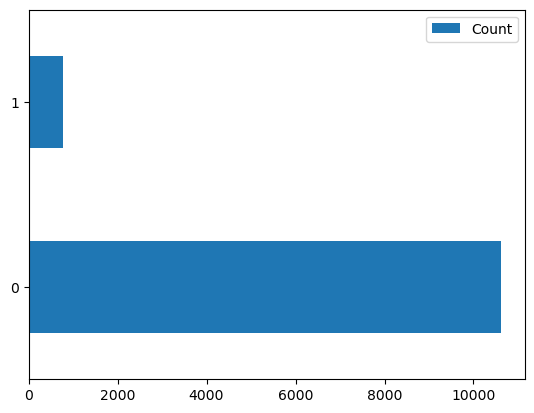

In [124]:
# your code goes here
QUERY="""
SELECT MainBranch, Count(*) AS Count
FROM Master
GROUP BY MainBranch
"""
df = pd.read_sql_query(QUERY, conn)
df.plot.barh()

Close the database connection.


In [ ]:
conn.close()

## Authors


Ramesh Sannareddy


### Other Contributors


Rav Ahuja


## Change Log


| Date (YYYY-MM-DD) | Version | Changed By        | Change Description                 |
| ----------------- | ------- | ----------------- | ---------------------------------- |
| 2020-10-17        | 0.1     | Ramesh Sannareddy | Created initial version of the lab |


 Copyright © 2020 IBM Corporation. This notebook and its source code are released under the terms of the [MIT License](https://cognitiveclass.ai/mit-license?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork928-2023-01-01&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ).
